In [177]:
import pandas as pd
from tqdm import tqdm
import warnings
warnings.filterwarnings("ignore")
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('OPERATE_HIS.csv')

In [3]:
driver = data['CHAUFFEUR_NO'].unique()

In [158]:
date = '2017-{}-{}'
days = {2:[i for i in range(1,29)],3:[i for i in range(1,32)]}

### 计算每人每天工资

In [114]:
salary = {}
for dri in tqdm(driver):
    if dri not in salary:
        salary[dri] = {}
    taxi = data[data['CHAUFFEUR_NO'] == dri]
    taxi['WORK_END_TIME'] = pd.to_datetime(taxi['WORK_END_TIME'])
    taxi['WORK_END_TIME'] = pd.to_datetime(taxi['WORK_END_TIME'].apply(lambda x:'{}-{}-{}'.format(x.year,x.month,x.day)))
    for i in [2,3]:
        for j in day[i]:
            if date.format(i,j) in salary[dri]:
                salary[dri][date.format(i,j)] += taxi[taxi['WORK_END_TIME'] == date.format(i,j)]['OPERATE_MONEY'].sum() / 100
            else :
                salary[dri][date.format(i,j)] = taxi[taxi['WORK_END_TIME'] == date.format(i,j)]['OPERATE_MONEY'].sum() / 100

100%|██████████████████████████████████████████████████████████████████████████| 11503/11503 [2:06:59<00:00,  1.51it/s]


In [61]:
import json

In [117]:
with open('Salary.json','w') as f:
    f.write(json.dumps(salary))

### 计算整体平均分时段工资

In [45]:
data['TIME'] = pd.Series(map(lambda x:int(x[-8:-6]),data['WORK_END_TIME']))

In [52]:
# 平均的凌晨工资
early_morning = data[pd.Series(map(lambda x:x >= 0 and x < 6,data['TIME']))]['OPERATE_MONEY'].sum() / (5900 * driver.shape[0])
early_morning

55.45701544328156

In [53]:
morning = data[pd.Series(map(lambda x:x >= 6 and x < 12,data['TIME']))]['OPERATE_MONEY'].sum() / (5900 * driver.shape[0])
morning

94.54394426214532

In [56]:
afternoon = data[pd.Series(map(lambda x:x >= 12 and x < 18,data['TIME']))]['OPERATE_MONEY'].sum() / (5900 * driver.shape[0])
afternoon

120.99858636729991

In [57]:
night = data[pd.Series(map(lambda x:x >= 18 and x < 24,data['TIME']))]['OPERATE_MONEY'].sum() / (5900 * driver.shape[0])
night

121.88398691866676

In [59]:
mean = {'early_morning' : early_morning,
       'morning' : morning,
       'afternoon' : afternoon,
       'night' : night}

In [62]:
with open('Salary_mean.json','w') as f:
    f.write(json.dumps(mean))

### 计算整体平均每天分时段工资

In [141]:
data['DAY'] = pd.Series(map(lambda x:x[:4].rstrip('/'),data['WORK_END_TIME']))

In [162]:
salary = {}
for mouth in [2,3]:
    for day in tqdm(days[mouth]):
        # 寻找当天的记录
        dataset = data[data['DAY'] == '{}/{}'.format(day,mouth)]
        dataset.index = range(dataset.shape[0])
        # 当天四个时段的记录
        early_morning = dataset[pd.Series(map(lambda x:x >= 0 and x < 6,dataset['TIME']))]['OPERATE_MONEY'].sum() / (100 * driver.shape[0])
        morning = dataset[pd.Series(map(lambda x:x >= 6 and x < 12,dataset['TIME']))]['OPERATE_MONEY'].sum() / (100 * driver.shape[0])
        afternoon = dataset[pd.Series(map(lambda x:x >= 12 and x < 18,dataset['TIME']))]['OPERATE_MONEY'].sum() / (100 * driver.shape[0])
        night = dataset[pd.Series(map(lambda x:x >= 18 and x < 24,dataset['TIME']))]['OPERATE_MONEY'].sum() / (100 * driver.shape[0])
        # 记录
        salary['{}/{}'.format(day,mouth)] = {
            'early_morning' : early_morning,
            'morning' : morning,
            'afternoon' : afternoon,
            'night' : night
        }

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [00:23<00:00,  1.29it/s]


In [166]:
with open('salary_day_mean.json','w') as f:
    json.dump(salary,f)

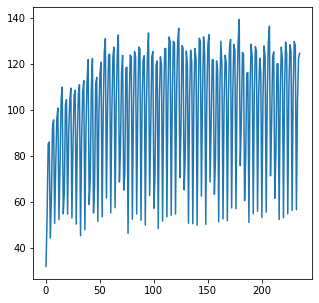

In [190]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(vis_.T.ravel())

plt.show()